<a href="https://colab.research.google.com/github/joangog/object-detection/blob/main/coco2017_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model comparison on COCO 2017 dataset
*   SSD300 VGG16
*   Faster R-CNN ResNet-50 FPN
*   Mask R-CNN ResNet-50 FPN
*   YOLOv5s
*   YOLOv5m






### Set up requirements

In [1]:
# Import packages
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.models.detection import ssd300_vgg16, fasterrcnn_resnet50_fpn, maskrcnn_resnet50_fpn
import cv2
from pycocotools import coco

In [21]:
# Install Yolov5
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install --quiet -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 8704, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 8704 (delta 269), reused 262 (delta 147), pack-reused 8286
Receiving objects: 100% (8704/8704), 9.64 MiB | 27.65 MiB/s, done.
Resolving deltas: 100% (6009/6009), done.
/content/yolov5


### Download COCO 2017 dataset

In [72]:
# Download images
%cd /content
!wget 'http://images.cocodataset.org/zips/val2017.zip'
!unzip -q 'val2017.zip'
!rm 'val2017.zip'

/content
--2021-08-03 13:57:16--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.246.52
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.246.52|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  73.7MB/s    in 11s     

2021-08-03 13:57:27 (69.4 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [104]:
# Download annotations
%cd /content
!wget 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'
!unzip -q 'annotations_trainval2017.zip'
!rm 'annotations_trainval2017.zip'

/content
--2021-08-03 14:12:37--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.97.92
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.97.92|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  57.1MB/s    in 4.4s    

2021-08-03 14:12:42 (54.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

replace annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
All


In [105]:
# Move annotations to images folder
!cp '/content/annotations/instances_val2017.json' '/content/val2017'

### Load COCO 2017 dataset

In [2]:
img_dir = '/content/val2017'
ann_file = os.path.join(img_dir,'instances_val2017.json')

dataset = coco.COCO(ann_file)
img_ids = dataset.getImgIds()

loading annotations into memory...
Done (t=1.04s)
creating index...
index created!


### Load pre-trained model

In [3]:
# @markdown Model Selection { display-mode: "form", run: "auto" }
model_name = 'SSD300 VGG16' # @param ['SSD300 VGG16', 'Faster R-CNN ResNet-50 FPN', 'Mask R-CNN ResNet-50 FPN', 'YOLOv5s', 'YOLOv5m']

if model_name == 'SSD300 VGG16':
  model = ssd300_vgg16(pretrained=True, progress=True)
elif model_name == 'Faster R-CNN ResNet-50 FPN':
  model = fasterrcnn_resnet50_fpn(pretrained=True, progress=True)
elif model_name == 'Mask R-CNN ResNet-50 FPN':
  model = maskrcnn_resnet50_fpn(pretrained=True, progress=True)
elif model_name == 'YOLOv5s':
  model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
elif model_name == 'YOLOv5m':
  model = torch.hub.load('ultralytics/yolov5', 'yolov5m')

print('Loaded model: '+ model_name + '\n')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Loaded model: SSD300 VGG16



### Run Inference

/content
[[217.62, 240.54, 38.99, 57.75], [1.0, 240.24, 346.63, 186.76], [388.66, 69.92, 109.41, 277.62], [135.57, 249.43, 22.32, 28.79], [31.28, 344.0, 68.12, 40.83], [59.63, 287.36, 76.07, 41.3], [1.36, 164.33, 192.56, 98.37], [0.0, 262.81, 62.16, 36.77], [119.4, 272.51, 24.82, 34.25], [141.47, 267.91, 32.19, 35.86], [155.97, 168.95, 26.03, 17.13], [157.2, 114.15, 17.86, 15.82], [98.75, 304.78, 10.78, 5.57], [166.03, 256.36, 8.82, 18.58], [86.41, 293.97, 23.96, 11.18], [70.14, 296.16, 9.28, 4.58], [0.0, 210.9, 191.36, 98.98], [96.69, 297.09, 7.84, 4.86], [497.25, 203.4, 122.01, 28.61]]
[[15.319060325622559, 1.2582521438598633, 518.50732421875, 425.55242919921875], [0.42501628398895264, 151.9844207763672, 109.73767852783203, 384.59796142578125], [395.2979431152344, 5.050198554992676, 524.41259765625, 119.10617065429688], [122.87625885009766, 4.674580097198486, 239.51600646972656, 109.84705352783203], [122.99076843261719, 198.0250244140625, 350.61773681640625, 419.0954284667969], [224.

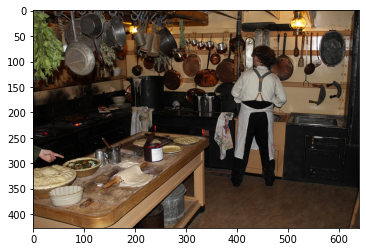

In [33]:
%cd /content

img_id = 397133
img = cv2.cvtColor(cv2.imread(os.path.join(img_dir,dataset.loadImgs([img_id])[0]['file_name'])), cv2.COLOR_BGR2RGB)
img_dim = img.shape
img_formatted = torch.tensor(np.divide(img,255).reshape((img_dim[2],img_dim[0],img_dim[1]))).unsqueeze_(0).float()
img_anns = dataset.loadAnns(dataset.getAnnIds(img_id))

plt.figure()
plt.imshow(img)

# Get ground truth bounding boxes
true_box = []
for ann in img_anns:
  true_box.append(ann['bbox'])

# Enable evaluation mode
model.eval()

# Get predicted bounding boxes
predictions = model(img_formatted)

if type(predictions) is list:  # If predictions format is list
  pred_box = predictions[0]['boxes']
elif type(predictions) is dict:  # i=If predictions format is dictionary
  pred_box = predictions.xyxy
else:
  pred_box = []
pred_box = pred_box.tolist()  # Convert tensor to list

print(true_box)
print(pred_box)



### Calculate IoU

In [36]:
def iou(true_box, pred_box):
    inter_box_top_left = [max(true_box[0], pred_box[0]), max(true_box[1], pred_box[1])]
    inter_box_bottom_right = [min(true_box[0]+true_box[2], pred_box[0]+pred_box[2]), min(true_box[1]+true_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = true_box[2] * true_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union

iou(true_box, pred_box)

TypeError: ignored